<a href="https://colab.research.google.com/github/piyush9625/Data-Analyst-Intern-Assignment/blob/main/Data_Analyst_Assigment_Upliance_AI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

# Load the provided data into a DataFrame (simulated from the uploaded details)
data = {
    "User ID": ["U001", "U002", "U003", "U004", "U005", "U006", "U007", "U008", "U009", "U010"],
    "User Name": ["Alice Johnson", "Bob Smith", "Charlie Lee", "David Brown", "Emma White",
                  "Frank Green", "Grace King", "Henry Lee", "Irene Moore", "Jack White"],
    "Age": [28, 35, 42, 27, 30, 25, 38, 31, 33, 29],
    "Location": ["New York", "Los Angeles", "Chicago", "San Francisco", "Seattle",
                 "Austin", "Boston", "Miami", "Dallas", "Phoenix"],
    "Registration Date": ["2023-01-15", "2023-02-20", "2023-03-10", "2023-04-05", "2023-05-22",
                          "2023-06-15", "2023-07-02", "2023-08-11", "2023-09-01", "2023-10-10"],
    "Phone": ["123-456-7890", "987-654-3210", "555-123-4567", "444-333-2222", "777-888-9999",
              "888-777-6666", "999-888-7777", "101-202-3030", "202-303-4040", "303-404-5050"],
    "Email": ["alice@email.com", "bob@email.com", "charlie@email.com", "david@email.com",
              "emma@email.com", "frank@email.com", "grace@email.com", "henry@email.com",
              "irene@email.com", "jack@email.com"],
    "Favorite Meal": ["Dinner", "Lunch", "Breakfast", "Dinner", "Lunch", "Dinner", "Breakfast",
                      "Dinner", "Lunch", "Dinner"],
    "Total Orders": [12, 8, 15, 10, 9, 7, 14, 5, 6, 8]
}

user_details_df = pd.DataFrame(data)

# Convert Registration Date to datetime format
user_details_df["Registration Date"] = pd.to_datetime(user_details_df["Registration Date"])

# Display the first few rows for review
user_details_df.head()


,User ID,User Name,Age,Location,Registration Date,Phone,Email,Favorite Meal,Total Orders
0,U001,Alice Johnson,28,New York,2023-01-15,123-456-7890,alice@email.com,Dinner,12
1,U002,Bob Smith,35,Los Angeles,2023-02-20,987-654-3210,bob@email.com,Lunch,8
2,U003,Charlie Lee,42,Chicago,2023-03-10,555-123-4567,charlie@email.com,Breakfast,15
3,U004,David Brown,27,San Francisco,2023-04-05,444-333-2222,david@email.com,Dinner,10
4,U005,Emma White,30,Seattle,2023-05-22,777-888-9999,emma@email.com,Lunch,9


In [ ]:
from google.colab import sheets
sheet = sheets.InteractiveSheet(df=user_details_df)

https://docs.google.com/spreadsheets/d/1-qIsJC72w68OmBlIA37T0Rk_i7YmtusA6q2U8hpjQnE#gid=0


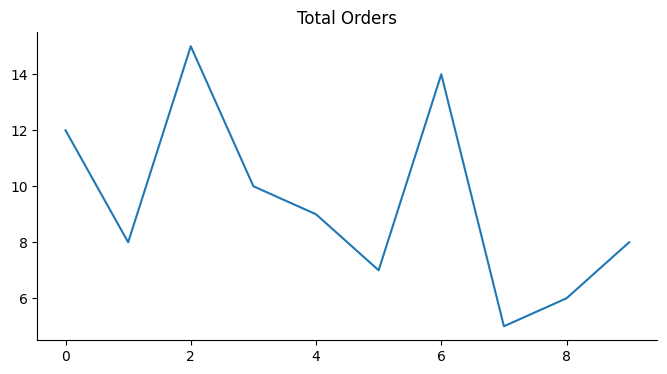

In [ ]:
# @title Total Orders

from matplotlib import pyplot as plt
user_details_df['Total Orders'].plot(kind='line', figsize=(8, 4), title='Total Orders')
plt.gca().spines[['top', 'right']].set_visible(False)

<ipython-input-3-410bf38a0be3>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(user_details_df, x='Age', y='Favorite Meal', inner='stick', palette='Dark2')


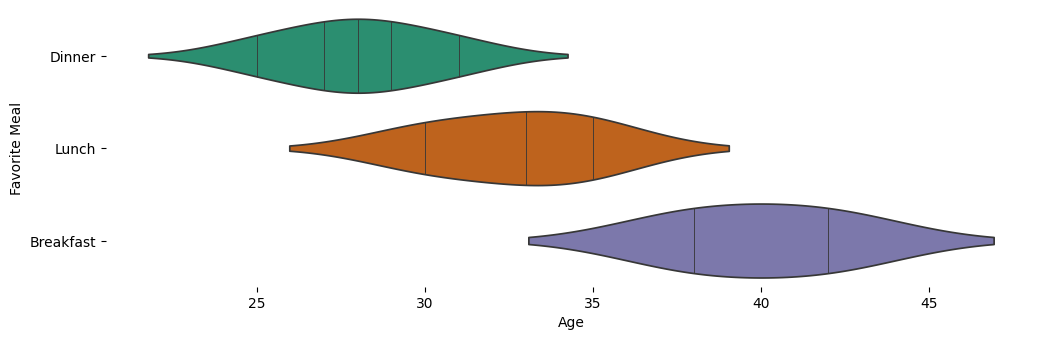

In [ ]:
# @title Favorite Meal vs Age

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(user_details_df['Favorite Meal'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(user_details_df, x='Age', y='Favorite Meal', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

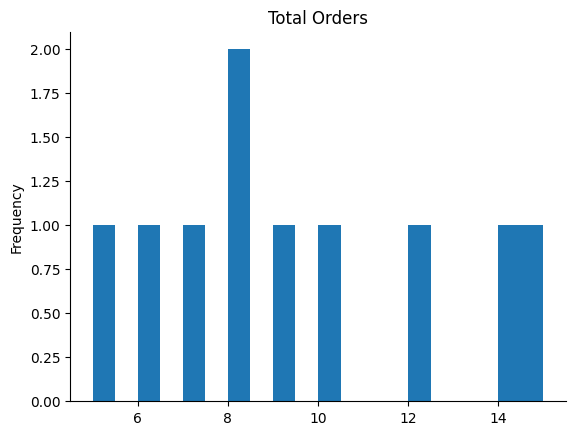

In [ ]:
# @title Total Orders

from matplotlib import pyplot as plt
user_details_df['Total Orders'].plot(kind='hist', bins=20, title='Total Orders')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
# Analyze the popularity of meals
meal_popularity = user_details_df["Favorite Meal"].value_counts()

# Analyze the total orders for each meal type
total_orders_by_meal = user_details_df.groupby("Favorite Meal")["Total Orders"].sum()

meal_popularity, total_orders_by_meal



(Favorite Meal
 Dinner       5
 Lunch        3
 Breakfast    2
 Name: count, dtype: int64,
 Favorite Meal
 Breakfast    29
 Dinner       42
 Lunch        23
 Name: Total Orders, dtype: int64)

<ipython-input-8-1c45b1ed4dcf>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=meal_popularity.index, y=meal_popularity.values, palette="viridis")


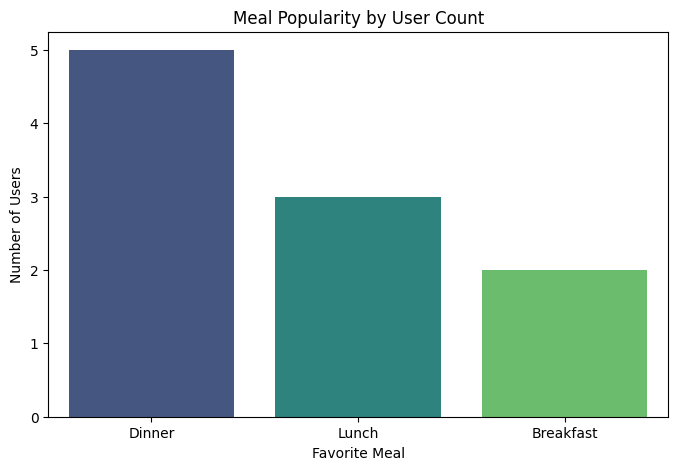

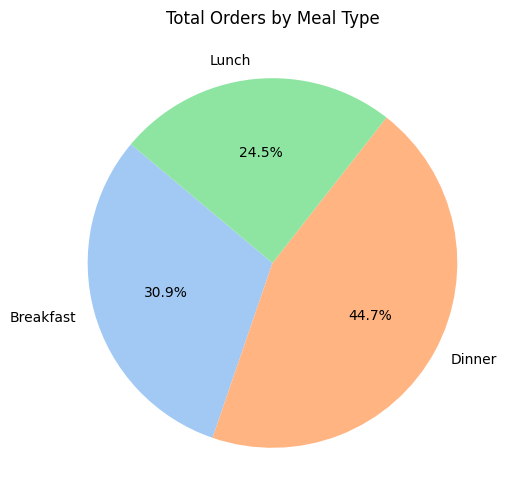

(               count       mean       std   min   25%   50%   75%   max
 Favorite Meal                                                          
 Breakfast        2.0  40.000000  2.828427  38.0  39.0  40.0  41.0  42.0
 Dinner           5.0  28.000000  2.236068  25.0  27.0  28.0  29.0  31.0
 Lunch            3.0  32.666667  2.516611  30.0  31.5  33.0  34.0  35.0,
 Favorite Meal  Breakfast  Dinner  Lunch
 Location                               
 Austin                 0       1      0
 Boston                 1       0      0
 Chicago                1       0      0
 Dallas                 0       0      1
 Los Angeles            0       0      1
 Miami                  0       1      0
 New York               0       1      0
 Phoenix                0       1      0
 San Francisco          0       1      0
 Seattle                0       0      1)

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Age distribution for each meal preference
age_distribution = user_details_df.groupby("Favorite Meal")["Age"].describe()

# Location-wise breakdown of favorite meals
location_meal_breakdown = user_details_df.groupby(["Location", "Favorite Meal"]).size().unstack(fill_value=0)

# Plot meal popularity
plt.figure(figsize=(8, 5))
sns.barplot(x=meal_popularity.index, y=meal_popularity.values, palette="viridis")
plt.title("Meal Popularity by User Count")
plt.xlabel("Favorite Meal")
plt.ylabel("Number of Users")
plt.show()

# Plot total orders by meal as a pie chart
plt.figure(figsize=(6, 6))
plt.pie(total_orders_by_meal, labels=total_orders_by_meal.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette("pastel"))
plt.title("Total Orders by Meal Type")
plt.show()

# Display demographic summaries
age_distribution, location_meal_breakdown
